In [ ]:
pip install opencv-python tensorflow numpy fer


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 809.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━


Menu:
1. Recognize Face and Detect Emotion from Image
2. Exit
Enter your choice: 1
Enter the path to the image: /content/Indian-cricketer-Mahendra-Singh-Dhoni-2011.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Enter your choice: 1


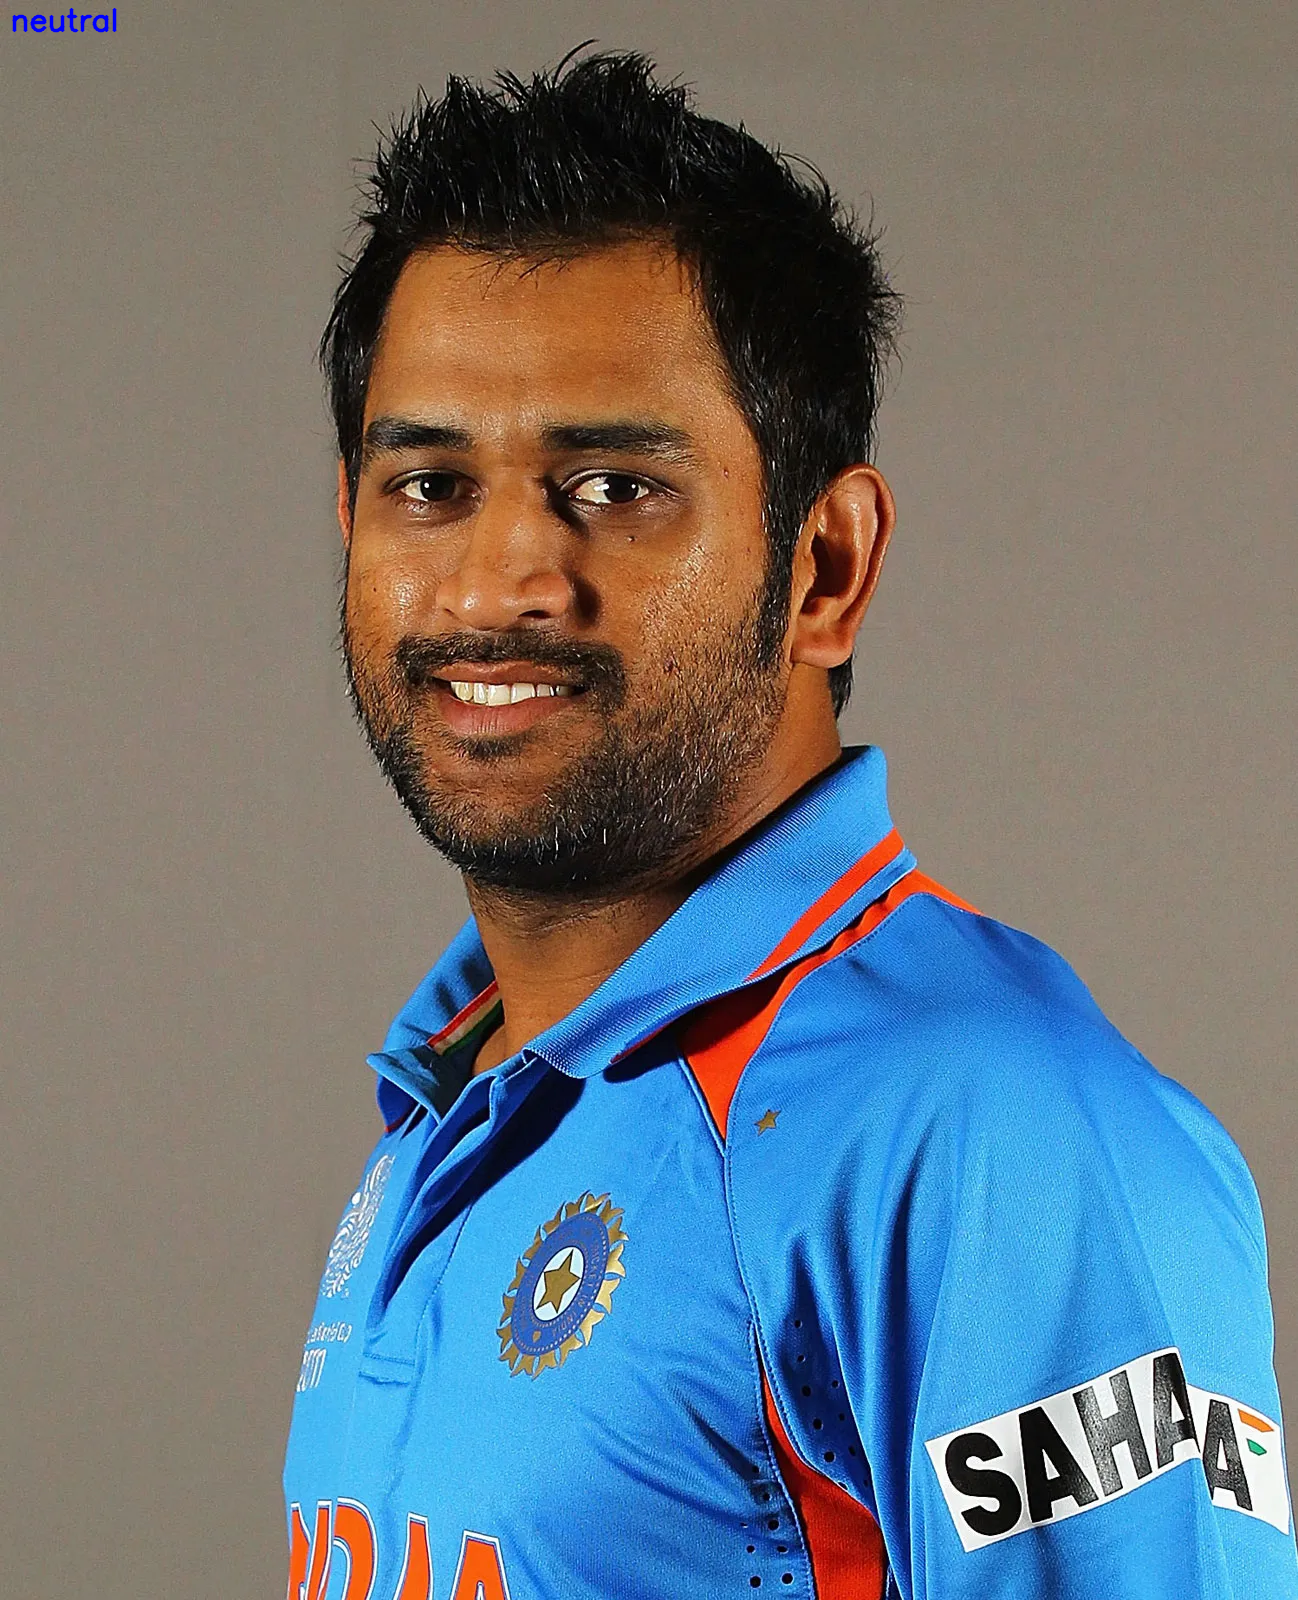

Predicted: [('n03724870', 'mask', 0.39411736), ('n04229816', 'ski_mask', 0.25912917), ('n04370456', 'sweatshirt', 0.09751415)]
Detected Emotion: neutral

Menu:
1. Recognize Face and Detect Emotion from Image
2. Exit


KeyboardInterrupt: Interrupted by user

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from fer import FER
import os
# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow


# Load pre-trained ResNet model
model = ResNet50(weights='imagenet', include_top=True)

# Initialize emotion detector
emotion_detector = FER()

def recognize_face_and_emotion(img_path):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for FER
    img_resized = cv2.resize(img, (224, 224))

    # Predict using the pre-trained ResNet model
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    preds = model.predict(img_array)

    # Decode the predictions
    decoded_preds = tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0]

    # Detect emotions
    emotion_predictions = emotion_detector.detect_emotions(img_rgb)
    dominant_emotion = max(emotion_predictions[0]['emotions'], key=emotion_predictions[0]['emotions'].get)

    # Overlay the dominant emotion on the image
    cv2.putText(img, dominant_emotion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Show the output image with emotion using cv2_imshow
    cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return decoded_preds, dominant_emotion

def main_menu():
    while True:
        print("\nMenu:")
        print("1. Recognize Face and Detect Emotion from Image")
        print("2. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            img_path = input("Enter the path to the image: ")
            if os.path.exists(img_path):
                preds, emotion = recognize_face_and_emotion(img_path)
                print("Predicted:", preds)
                print("Detected Emotion:", emotion)
            else:
                print("Image file not found. Please check the path.")
        elif choice == '2':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main_menu()